In [166]:
! pip install ipykernel

In [167]:
! pip install pandas

In [168]:
import pandas as pd

In [169]:
# Data Ingestions steps
df = pd.read_csv('data/Camp.csv')
df['Campaign_Name'].value_counts().reset_index(name='counts')


,Campaign_Name,counts
0,Flipkart,4579
1,Ajio,1945
2,Myntra,1095
3,GoDaddy,60
4,Croma Retail,53
5,Firstcry,15
6,Nykaa Beauty,6
7,Puma,6
8,Boat,6
9,Fernsnpetals,3


In [170]:
df.isnull().sum()

Campaign_Name    0
Id               0
Status           0
Date             0
Amount           0
Payout           0
Sub_Id           0
Currency         0
Partner          0
Inventory        0
Email_Id         0
dtype: int64

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7772 entries, 0 to 7771
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Campaign_Name  7772 non-null   object 
 1   Id             7772 non-null   int64  
 2   Status         7772 non-null   object 
 3   Date           7772 non-null   object 
 4   Amount         7772 non-null   float64
 5   Payout         7772 non-null   float64
 6   Sub_Id         7772 non-null   object 
 7   Currency       7772 non-null   object 
 8   Partner        7772 non-null   object 
 9   Inventory      7772 non-null   object 
 10  Email_Id       7772 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 668.0+ KB


In [172]:
df.columns.tolist()

['Campaign_Name',
 'Id',
 'Status',
 'Date',
 'Amount',
 'Payout',
 'Sub_Id',
 'Currency',
 'Partner',
 'Inventory',
 'Email_Id']

In [173]:
df.drop(columns=['Id', 'Status', 'Date', 'Currency', 'Inventory', 'Email_Id'], inplace=True)

In [174]:
df

,Campaign_Name,Amount,Payout,Sub_Id,Partner
0,Flipkart,1372.0,25.50,telegram,Admitad
1,Flipkart,231.0,5.90,app,Admitad
2,Flipkart,81064.0,48.60,store_page,Admitad
3,Flipkart,393.0,10.10,app,Admitad
4,Flipkart,214.0,5.10,app,Admitad
...,...,...,...,...,...
7767,Ajio,113.6,12.95,app,Cuelinks
7768,Ajio,143.6,16.37,app,Cuelinks
7769,Ajio,113.6,12.95,app,Cuelinks
7770,Ajio,263.6,30.05,app,Cuelinks


In [175]:
df.duplicated().sum()

np.int64(4818)

In [176]:
df = df.drop_duplicates()
df

,Campaign_Name,Amount,Payout,Sub_Id,Partner
0,Flipkart,1372.0,25.50,telegram,Admitad
1,Flipkart,231.0,5.90,app,Admitad
2,Flipkart,81064.0,48.60,store_page,Admitad
3,Flipkart,393.0,10.10,app,Admitad
4,Flipkart,214.0,5.10,app,Admitad
...,...,...,...,...,...
7765,Ajio,873.0,99.52,app,Cuelinks
7766,Ajio,423.0,48.22,app,Cuelinks
7767,Ajio,113.6,12.95,app,Cuelinks
7768,Ajio,143.6,16.37,app,Cuelinks


In [177]:
numerical_columns = df.columns[df.dtypes != 'object']
categorical_columns = df.columns[df.dtypes == 'object']
print("Numerical columns", numerical_columns)
print("Categorical columns", categorical_columns)

Numerical columns Index(['Amount', 'Payout'], dtype='object')
Categorical columns Index(['Campaign_Name', 'Sub_Id', 'Partner'], dtype='object')


In [178]:
df[categorical_columns].describe()

,Campaign_Name,Sub_Id,Partner
count,2954,2954,2954
unique,12,4,2
top,Flipkart,app,Admitad
freq,1803,1747,1843


In [179]:
df[numerical_columns].describe()

,Amount,Payout
count,2954.000000,2954.000000
mean,1232.081134,32.853612
std,4557.717192,71.022679
min,0.000000,0.000000
25%,165.215000,5.100000
50%,329.000000,13.500000
75%,685.780000,33.100000
max,81064.000000,1448.480000


In [180]:
df['Campaign_Name'].value_counts().reset_index(name='counts').sort_values(by = 'counts', ascending=False)

,Campaign_Name,counts
0,Flipkart,1803
1,Ajio,750
2,Myntra,336
3,Croma Retail,24
4,GoDaddy,14
5,Firstcry,7
6,Puma,6
7,Nykaa Beauty,5
8,Fernsnpetals,3
9,Boat,3


In [181]:
df['Sub_Id'].value_counts().reset_index(name='counts').sort_values(by = 'counts', ascending=False)

,Sub_Id,counts
0,app,1747
1,telegram,567
2,store_page,530
3,web,110


In [182]:
df['Partner'].value_counts().reset_index(name='counts').sort_values(by = 'counts', ascending=False)

,Partner,counts
0,Admitad,1843
1,Cuelinks,1111


In [183]:
! pip install seaborn

In [184]:
! pip install matplotlib

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

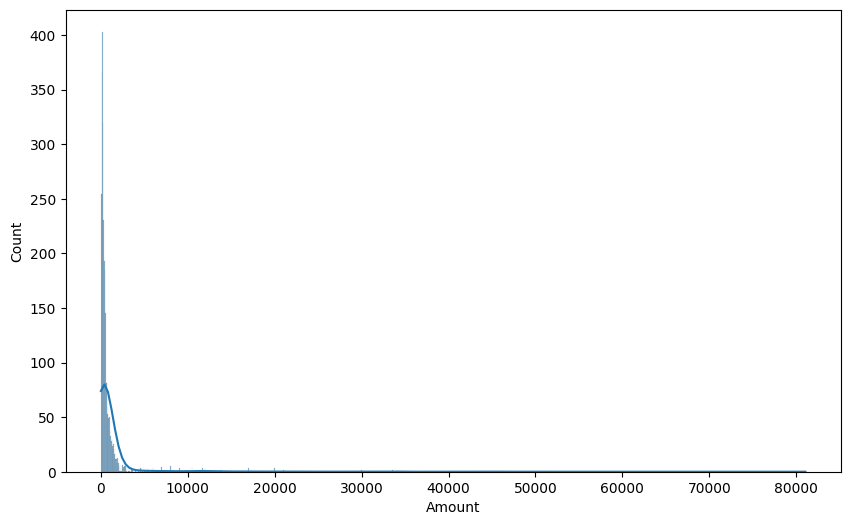

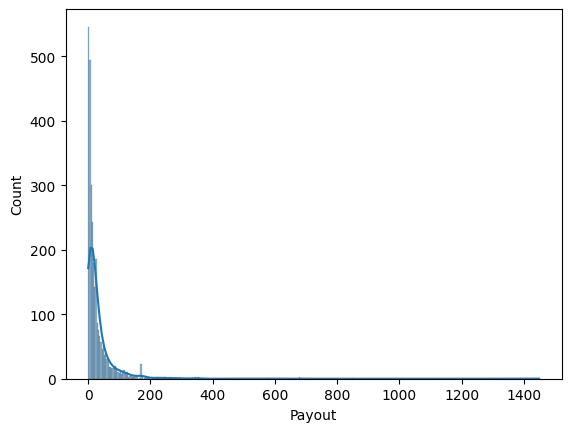

In [186]:
plt.figure(figsize=(10, 6))
x = 1
for i in numerical_columns:
     sns.histplot(data = df, x = i, kde=True)
     print("\n")
     plt.show()

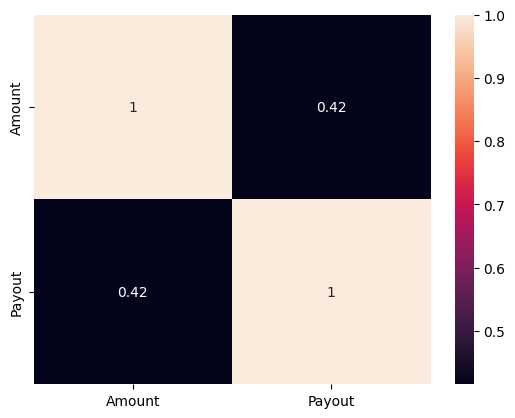

In [187]:
# correlation
df_1 = df.filter(items=['Amount', 'Payout'])
sns.heatmap(df_1.corr(), annot=True)
plt.show()

In [188]:
df['Campaign_Name'].unique()

array(['Flipkart ', 'Fernsnpetals', 'Puma', 'Myntra', 'Nykaa Beauty',
       'Firstcry', 'GoDaddy', 'Ajio', 'Pepperfry', 'Croma Retail', 'Boat',
       'Shopclues IN'], dtype=object)

In [189]:
df['Campaign_Name'].value_counts().reset_index(name='counts').sort_values(by = 'counts', ascending=False)

,Campaign_Name,counts
0,Flipkart,1803
1,Ajio,750
2,Myntra,336
3,Croma Retail,24
4,GoDaddy,14
5,Firstcry,7
6,Puma,6
7,Nykaa Beauty,5
8,Fernsnpetals,3
9,Boat,3


In [190]:
import pandas as pd

Campaign_Name_map = {
    "Pepperfry": 1,
    "Shopclues IN": 2,
    "Boat": 3,
    "Fernsnpetals ": 3,
    "Nykaa Beauty": 4,
    'Puma': 5,
    'Firstcry': 6,
    'GoDaddy': 7,
    'Croma Retail': 8,
    'Myntra': 9,
    'Ajio': 10,
    'Flipkart': 11
}
    
df_Campaign_Name = pd.DataFrame(list(Campaign_Name_map.items()), columns=['Campaign_Name', 'Value'])
df_Campaign_Name

,Campaign_Name,Value
0,Pepperfry,1
1,Shopclues IN,2
2,Boat,3
3,Fernsnpetals,3
4,Nykaa Beauty,4
5,Puma,5
6,Firstcry,6
7,GoDaddy,7
8,Croma Retail,8
9,Myntra,9


In [191]:
df['Sub_Id'].unique()

array(['telegram', 'app', 'store_page', 'web'], dtype=object)

In [192]:
Sub_Id_map = {
              'web':1,
              'store_page': 2,
              'telegram': 3,
              'app': 4
}

df_Sub_Id = pd.DataFrame(list(Sub_Id_map.items()), columns=['Sub_Id', 'Value'])
df_Sub_Id

,Sub_Id,Value
0,web,1
1,store_page,2
2,telegram,3
3,app,4


In [193]:
Partner_map = {
                'Cuelinks': 1,
                'Admitad': 2
          }

df_Partner = pd.DataFrame(list(Partner_map.items()), columns=['Partner', 'Value'])
df_Partner

,Partner,Value
0,Cuelinks,1
1,Admitad,2


In [ ]:
# Step 1: Strip whitespace and maybe do a simple replace
df['Campaign_Name'] = df['Campaign_Name'].str.strip()

# Optional: If there are variations like 'Puma [CPS] IN', map them manually
df['Campaign_Name'] = df['Campaign_Name'].replace({
    'Puma [CPS] IN': 'Puma',
    'Fernsnpetals': 'Fernsnpetals',
    'Myntra ': 'Myntra',
    'Flipkart ': 'Flipkart'
})

In [195]:
import warnings
warnings.filterwarnings('ignore')
df['Campaign_Name'] = df['Campaign_Name'].map(Campaign_Name_map)
df['Sub_Id'] = df['Sub_Id'].map(Sub_Id_map)
df['Partner'] = df['Partner'].map(Partner_map)

In [197]:
df

,Campaign_Name,Amount,Payout,Sub_Id,Partner
0,11.0,1372.0,25.50,3,2
1,11.0,231.0,5.90,4,2
2,11.0,81064.0,48.60,2,2
3,11.0,393.0,10.10,4,2
4,11.0,214.0,5.10,4,2
...,...,...,...,...,...
7765,10.0,873.0,99.52,4,1
7766,10.0,423.0,48.22,4,1
7767,10.0,113.6,12.95,4,1
7768,10.0,143.6,16.37,4,1
